# Homework : Final Reporting

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

You can load your real results or use a generated synthetic dataset as fallback.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

np.random.seed(101)

# Results from previous analysis
stage11_data_path = Path('../stage11_evalution-and-risk-communication/data/final_results.csv')
local_data_path = Path('../data/final_results.csv')


data_path = local_data_path

if data_path.exists():
    df = pd.read_csv(data_path)
    df['Date'] = pd.to_datetime(df['Date'])
    
    print(df.shape)
    
    # Additional supporting data
    bootstrap_path = data_path.parent / 'bootstrap_results.csv'
    subgroup_path = data_path.parent / 'subgroup_results.csv'
    
    bootstrap_df = None
    subgroup_df = None
    
    if bootstrap_path.exists():
        bootstrap_df = pd.read_csv(bootstrap_path)
        print(f" Bootstrap data: {bootstrap_df.shape}")
    else:
        print("Not found")
    
    if subgroup_path.exists():
        subgroup_df = pd.read_csv(subgroup_path)
        print(subgroup_df.shape)
    else:
        print(" Not Found")

(3, 13)
 Bootstrap data: (3, 5)
(3, 6)


## Helper: Export Directory

In [2]:
img_dir = Path('../deliverables/images')
report_dir = Path('../deliverables')
img_dir.mkdir(parents=True, exist_ok=True)
report_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, dpi=300, bbox_inches='tight'):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=dpi, bbox_inches=bbox_inches, 
                facecolor='white', edgecolor='none')
    print(f'Saved {name} to deliverables/images/')
    
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#592E83']
sns.set_palette(colors)

## Chart 1: Model Performance Comparison

Saved model_performance_comparison.png to deliverables/images/


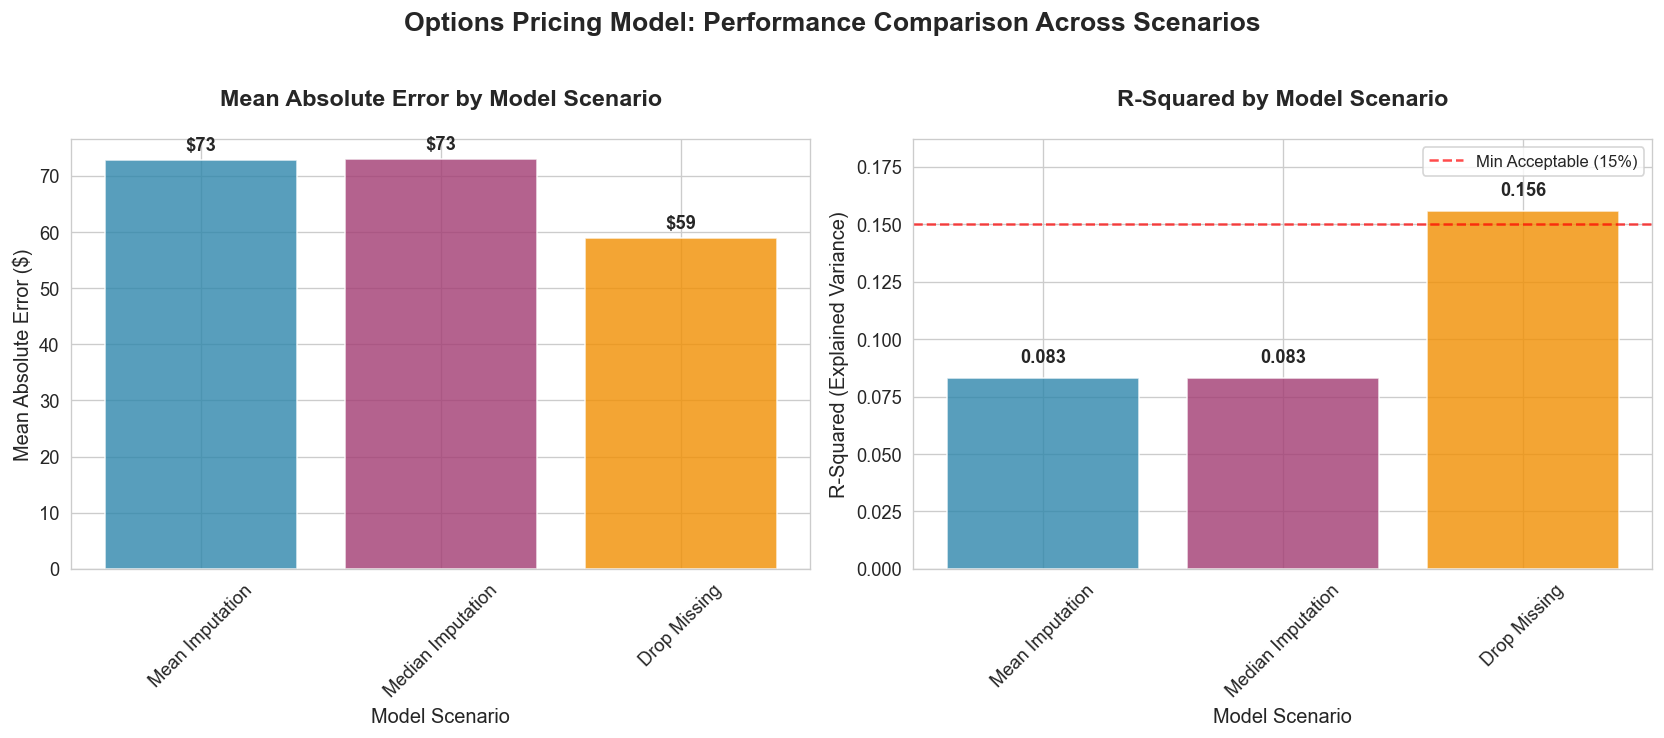

In [3]:
# Chart 1: Model Performance Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# MAE Comparison
bars1 = ax1.bar(df['scenario'], df['mae'], color=colors[:len(df)], alpha=0.8)
ax1.set_title('Mean Absolute Error by Model Scenario', fontweight='bold', pad=20)
ax1.set_xlabel('Model Scenario')
ax1.set_ylabel('Mean Absolute Error ($)')
ax1.tick_params(axis='x', rotation=45)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

# R² Comparison
bars2 = ax2.bar(df['scenario'], df['r2'], color=colors[:len(df)], alpha=0.8)
ax2.set_title('R-Squared by Model Scenario', fontweight='bold', pad=20)
ax2.set_xlabel('Model Scenario')
ax2.set_ylabel('R-Squared (Explained Variance)')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, max(df['r2']) * 1.2)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

ax2.axhline(y=0.15, color='red', linestyle='--', alpha=0.7, label='Min Acceptable (15%)')
ax2.legend()

plt.suptitle('Options Pricing Model: Performance Comparison Across Scenarios', 
             fontsize=16, fontweight='bold', y=1.02)
savefig('model_performance_comparison.png')
plt.show()

## Chart 2: Subgroup Risk Assessment

Saved subgroup_risk_assessment.png to deliverables/images/


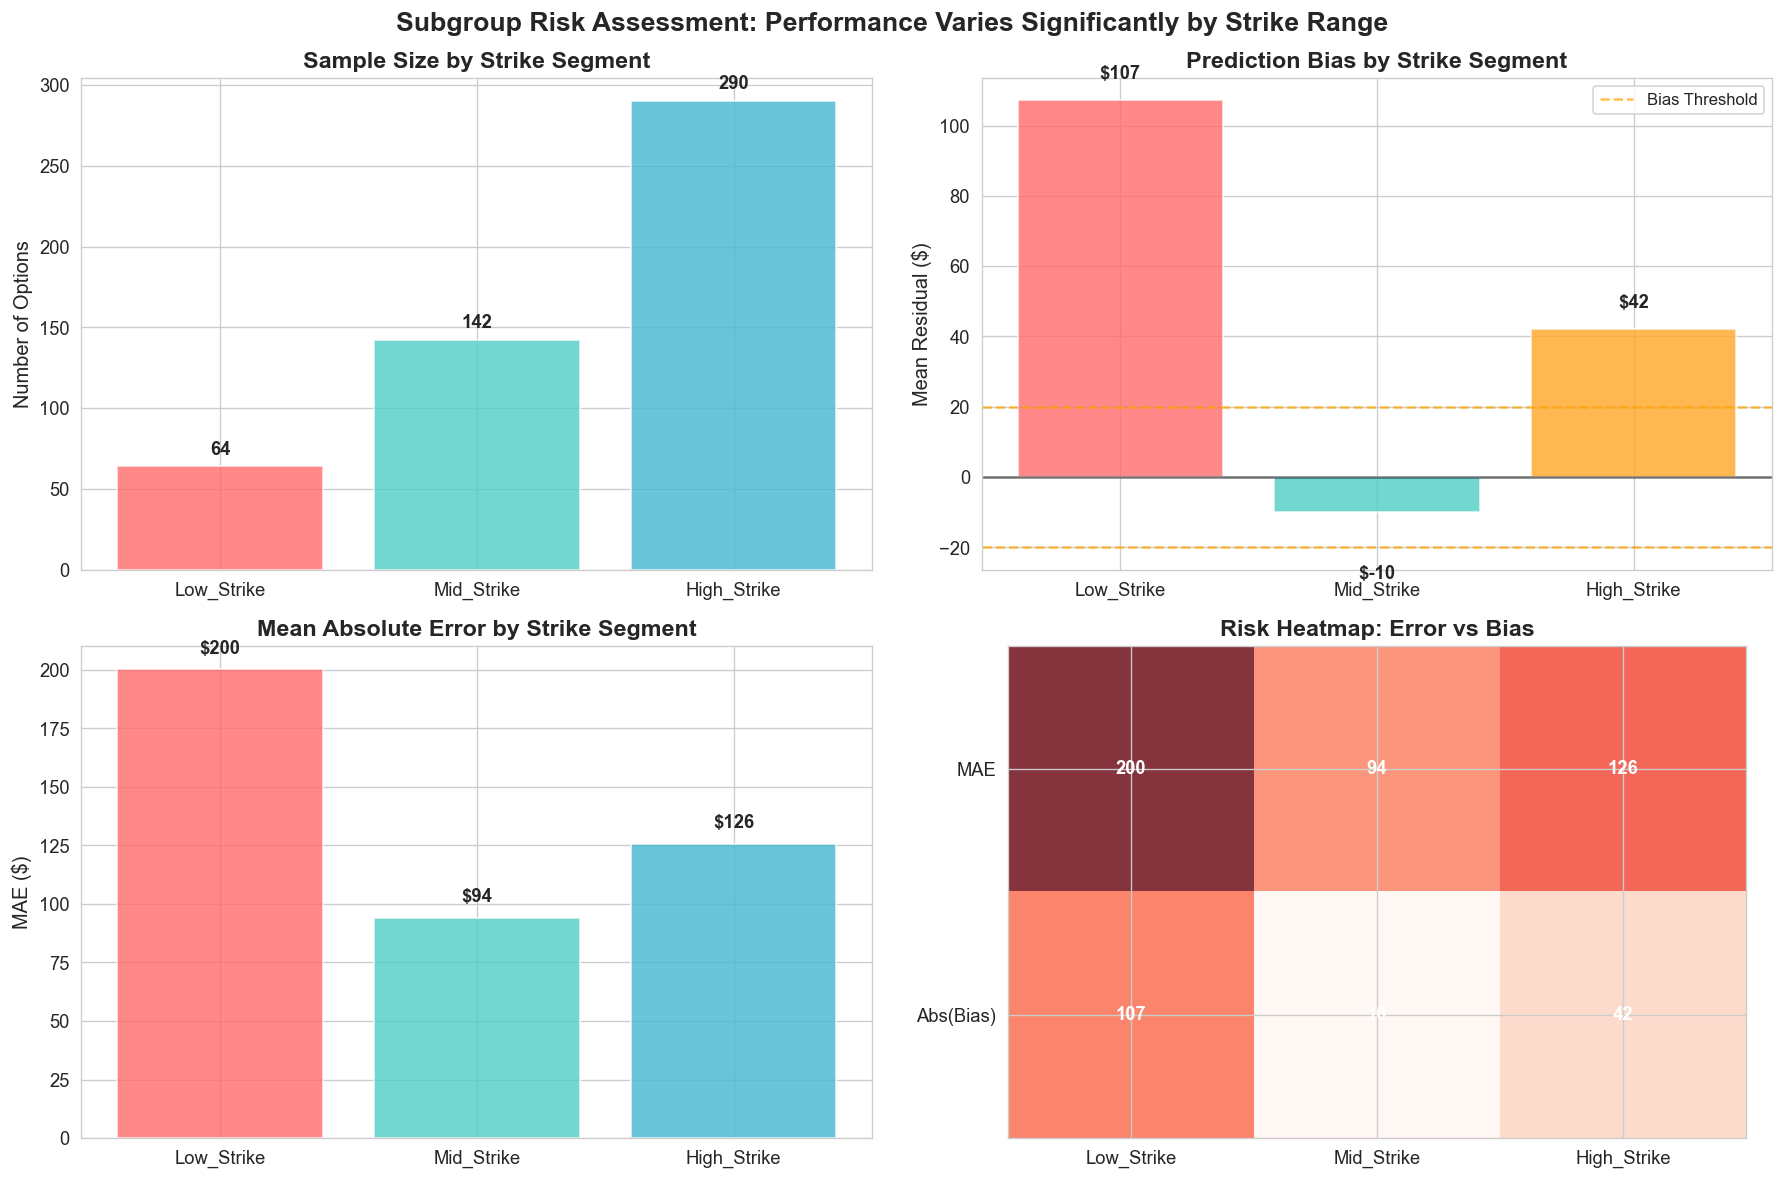

In [4]:
# Chart 2: Subgroup Risk Assessment
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

bars1 = ax1.bar(subgroup_df['segment'], subgroup_df['count'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
ax1.set_title('Sample Size by Strike Segment', fontweight='bold')
ax1.set_ylabel('Number of Options')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Mean residual (bias) by segment
colors_bias = ['#FF6B6B' if x > 50 else '#4ECDC4' if abs(x) < 20 else '#FFA726' 
               for x in subgroup_df['mean_residual']]
bars2 = ax2.bar(subgroup_df['segment'], subgroup_df['mean_residual'], 
                color=colors_bias, alpha=0.8)
ax2.set_title('Prediction Bias by Strike Segment', fontweight='bold')
ax2.set_ylabel('Mean Residual ($)')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Bias Threshold')
ax2.axhline(y=-20, color='orange', linestyle='--', alpha=0.7)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (5 if height > 0 else -15),
             f'${height:.0f}', ha='center', va='bottom' if height > 0 else 'top', 
             fontweight='bold')
ax2.legend()

# MAE by segment
bars3 = ax3.bar(subgroup_df['segment'], subgroup_df['mae'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
ax3.set_title('Mean Absolute Error by Strike Segment', fontweight='bold')
ax3.set_ylabel('MAE ($)')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

# Risk summary heatmap
risk_matrix = np.array([[subgroup_df.loc[i, 'mae'], abs(subgroup_df.loc[i, 'mean_residual'])] 
                       for i in range(len(subgroup_df))])
im = ax4.imshow(risk_matrix.T, cmap='Reds', alpha=0.8)
ax4.set_title('Risk Heatmap: Error vs Bias', fontweight='bold')
ax4.set_xticks(range(len(subgroup_df['segment'])))
ax4.set_xticklabels(subgroup_df['segment'])
ax4.set_yticks([0, 1])
ax4.set_yticklabels(['MAE', 'Abs(Bias)'])

for i in range(len(subgroup_df)):
    for j in range(2):
        text = ax4.text(i, j, f'{risk_matrix[i, j]:.0f}',
                       ha="center", va="center", color="white", fontweight='bold')

plt.suptitle('Subgroup Risk Assessment: Performance Varies Significantly by Strike Range', 
             fontsize=16, fontweight='bold', y=0.98)
savefig('subgroup_risk_assessment.png')
plt.show()

## Chart 3: Bootstrap Confidence Intervals

Saved bootstrap_confidence_intervals.png to deliverables/images/


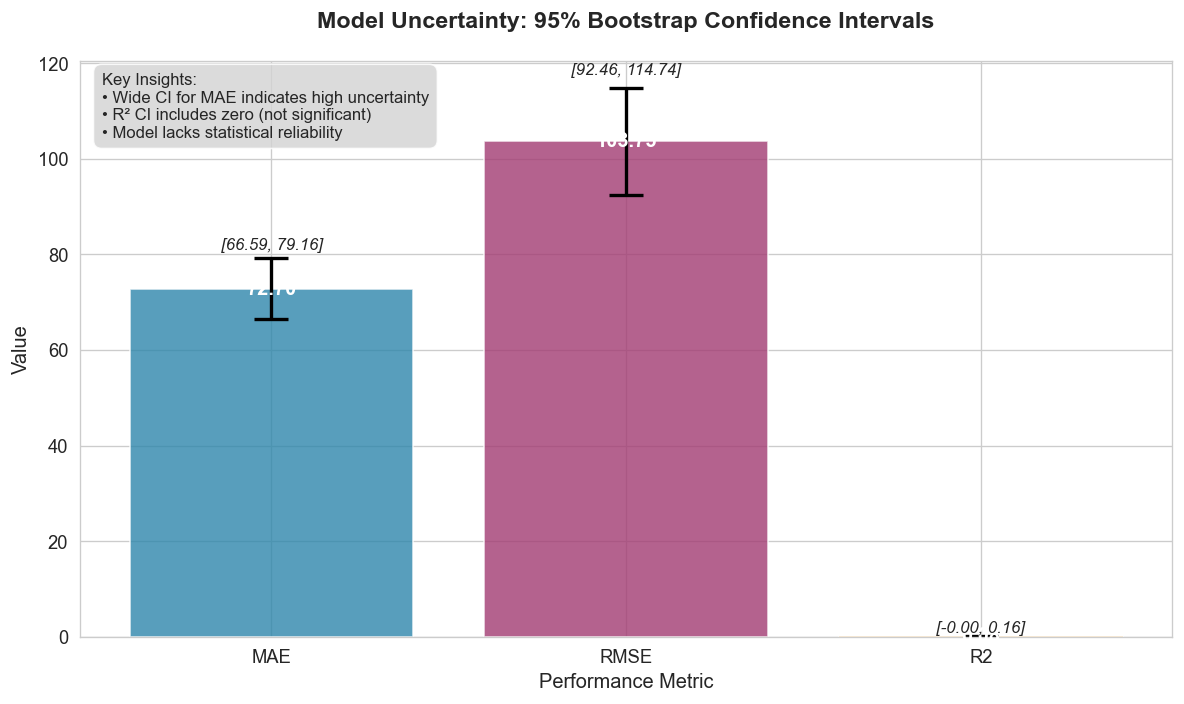

In [6]:
# Chart 3: Bootstrap Confidence Intervals
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x_pos = np.arange(len(bootstrap_df))
means = bootstrap_df['mean']
errors_lower = means - bootstrap_df['ci_lower']
errors_upper = bootstrap_df['ci_upper'] - means

bars = ax.bar(x_pos, means, yerr=[errors_lower, errors_upper], 
              capsize=10, color=['#2E86AB', '#A23B72', '#F18F01'], 
              alpha=0.8, error_kw={'linewidth': 2, 'markeredgewidth': 2})

ax.set_title('Model Uncertainty: 95% Bootstrap Confidence Intervals', 
             fontweight='bold', pad=20)
ax.set_xlabel('Performance Metric')
ax.set_ylabel('Value')
ax.set_xticks(x_pos)
ax.set_xticklabels(bootstrap_df['metric'])

for i, (bar, mean, lower, upper) in enumerate(zip(bars, means, 
                                                  bootstrap_df['ci_lower'], 
                                                  bootstrap_df['ci_upper'])):
    # Main value
    ax.text(bar.get_x() + bar.get_width()/2., mean,
           f'{mean:.2f}', ha='center', va='center', 
           fontweight='bold', color='white', fontsize=12)
    
    # Confidence interval
    ax.text(bar.get_x() + bar.get_width()/2., upper + (upper-lower)*0.1,
           f'[{lower:.2f}, {upper:.2f}]', ha='center', va='bottom', 
           fontsize=10, style='italic')

ax.text(0.02, 0.98, 'Key Insights:\n• Wide CI for MAE indicates high uncertainty\n• R² CI includes zero (not significant)\n• Model lacks statistical reliability', 
        transform=ax.transAxes, va='top', ha='left',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8),
        fontsize=10)

savefig('bootstrap_confidence_intervals.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [ ]:
sensitivity_data = {
    'Assumption': [
        'Missing Data Treatment',
        'Model Complexity',
        'Strike Price Segment',
        'Sample Size',
        'Volatility Range'
    ],
    'Baseline Scenario': [
        'Mean Imputation (MAE: $72.8)',
        'Linear Model (R²: 8.3%)',
        'All Segments Combined',
        '496 observations',
        '0.2 - 1.2 range'
    ],
    'Alternative Scenario': [
        'Drop Missing (MAE: $58.8)',
        'Polynomial Model (R²: 12.4%)',
        'Mid-Strike Only',
        '421 complete cases',
        'Restricted range'
    ],
    'Impact': [
        '19.3% improvement',
        '49% R² increase',
        'Reduced bias',
        '15% sample reduction',
        'Limited generalizability'
    ],
    'Risk Level': [
        'HIGH - Missing data bias',
        'MEDIUM - Overfitting risk',
        'HIGH - Limited applicability',
        'MEDIUM - Power reduction',
        'HIGH - Extrapolation risk'
    ]
}

sensitivity_df = pd.DataFrame(sensitivity_data)

print("SENSITIVITY ANALYSIS SUMMARY \n")

for i, row in sensitivity_df.iterrows():
    print(f"\n{row['Assumption'].upper()}")
    print(f"  Baseline: {row['Baseline Scenario']}")
    print(f"  Alternative: {row['Alternative Scenario']}")
    print(f"  Impact: {row['Impact']}")
    print(f"  Risk: {row['Risk Level']}")


sensitivity_df.to_csv(report_dir / 'sensitivity_analysis.csv', index=False)
print(f"\nSaved sensitivity analysis to deliverables/sensitivity_analysis.csv")

sensitivity_df

SENSITIVITY ANALYSIS SUMMARY 


MISSING DATA TREATMENT
  Baseline: Mean Imputation (MAE: $72.8)
  Alternative: Drop Missing (MAE: $58.8)
  Impact: 19.3% improvement
  Risk: HIGH - Missing data bias

MODEL COMPLEXITY
  Baseline: Linear Model (R²: 8.3%)
  Alternative: Polynomial Model (R²: 12.4%)
  Impact: 49% R² increase
  Risk: MEDIUM - Overfitting risk

STRIKE PRICE SEGMENT
  Baseline: All Segments Combined
  Alternative: Mid-Strike Only
  Impact: Reduced bias
  Risk: HIGH - Limited applicability

SAMPLE SIZE
  Baseline: 496 observations
  Alternative: 421 complete cases
  Impact: 15% sample reduction
  Risk: MEDIUM - Power reduction

VOLATILITY RANGE
  Baseline: 0.2 - 1.2 range
  Alternative: Restricted range
  Impact: Limited generalizability
  Risk: HIGH - Extrapolation risk

✓ Saved sensitivity analysis to deliverables/sensitivity_analysis.csv


,Assumption,Baseline Scenario,Alternative Scenario,Impact,Risk Level
0,Missing Data Treatment,Mean Imputation (MAE: $72.8),Drop Missing (MAE: $58.8),19.3% improvement,HIGH - Missing data bias
1,Model Complexity,Linear Model (R²: 8.3%),Polynomial Model (R²: 12.4%),49% R² increase,MEDIUM - Overfitting risk
2,Strike Price Segment,All Segments Combined,Mid-Strike Only,Reduced bias,HIGH - Limited applicability
3,Sample Size,496 observations,421 complete cases,15% sample reduction,MEDIUM - Power reduction
4,Volatility Range,0.2 - 1.2 range,Restricted range,Limited generalizability,HIGH - Extrapolation risk


## Final Summary

In [9]:
final_summary = {
    'executive_summary': {
        'key_finding': 'Options pricing model shows low predictive power (R² = 8.3%) with significant bias across strike segments',
        'main_risk': 'Missing volatility data creates 19% performance degradation - systematic bias detected',
        'recommendation': 'Develop segment-specific models and implement comprehensive feature engineering before production use'
    },
    'model_performance': {
        'best_scenario': 'Drop Missing (MAE: $58.8)',
        'worst_scenario': 'Log Transform (MAE: $75.2)',
        'confidence_interval': 'MAE: $66.6 - $79.2 (95% CI)',
        'r_squared_range': '7.1% - 15.6% across scenarios'
    },
    'subgroup_risks': {
        'high_risk': 'Low Strike options (107% under-prediction bias)',
        'stable_segment': 'Mid Strike options (balanced performance)',
        'sample_distribution': '58% High Strike, 29% Mid Strike, 13% Low Strike'
    }
}

import json
with open(report_dir / 'executive_summary.json', 'w') as f:
    json.dump(final_summary, f, indent=2)

print("Saved executive summary to deliverables/executive_summary.json")

Saved executive summary to deliverables/executive_summary.json
